# Identifying Clusters in NFL_data Skill Positions non-QB

### Purpose: explore the data to find distinct clusters that may be utilized in ML

Note: Distinct clusters were not readily identified. There could be up to 4 clusters in this orginal Dataset. However, unsupervised learning does not result in usable ranking data for our purposes.  


### <span style='color:green '>Setup Dependencies</span>
<span style='color:green '>Suppress Thread Management Errors</span>  
<span style='color:green '>Setup Default Matplotlib Cycle Colors</span>

In [4]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import seaborn as sns
import pandas as pd
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
mpl.rcParams['axes.prop_cycle'] = cycler(color=['#f2984e','#5d68b0', '#869976', '#f1bff2', '#fcba03', '#b103fc', '#03fce7'])

In [9]:
# Labels Columnns to be droped for training 
col = [0,1,2,3]

### <span style='color:green '>Get Our Data</span>

In [10]:
file_path = 'Resources/ADPxFinal.csv'
df = pd.read_csv(file_path)
df.sample(5)

,Unnamed: 0,Player,Pos,2021 Tm,Age,2021 Games,2021 GS,2021 Tgt,2021 Rec,2021 RushingYds,...,TotYdsScrm20,Production20,Usage21,Touchdowns21,TotYdsScrm21,Production21,Average Total Usage,Average Total Yards,Average Total Production,AVG
272,145,Marcus Johnson,WR,TEN,27.0,7,3,19.0,9.0,-2.0,...,255.0,66.785714,4.000000,0.0,158.0,39.500000,4.689394,230.000000,50.308571,NaN
14,249,D'Andre Swift,RB,DET,22.0,13,4,78.0,62.0,617.0,...,878.0,67.508772,17.615385,7.0,1069.0,61.082969,10.256410,649.000000,42.863914,14.5
199,287,Jordan Howard,RB,PHI,27.0,7,0,5.0,2.0,406.0,...,57.0,11.861111,13.000000,3.0,425.0,32.923077,10.480952,358.666667,29.990719,351.0
491,491,Dominique Dafney,TE,GNB,24.0,10,2,4.0,2.0,0.0,...,26.0,33.750000,0.600000,0.0,34.0,56.666667,0.466667,20.000000,30.138889,NaN
273,147,Kristian Wilkerson,WR,NWE,24.0,3,1,8.0,4.0,0.0,...,0.0,0.000000,4.000000,2.0,42.0,11.000000,1.333333,14.000000,3.666667,NaN


In [11]:
# Evaluate target information 
target_counts = df['Production21'].value_counts()
# print(f'Number of patients with myopia: {target_counts[1]}')
# print(f'Number of patients without myopia: {target_counts[0]}')
target_counts

 28.000000    4
 12.000000    3
 64.000000    3
 68.000000    3
 0.000000     3
             ..
 98.227848    1
 28.157303    1
 69.062500    1
 74.666667    1
-3.000000     1
Name: Production21, Length: 473, dtype: int64

### <span style='color:green '>Create a new dataframe for t-SNE and data Visualization</span>

In [19]:
# Create a new dataframe for t-SNE
# Drop Target Column from our data set for unsupervised learning
# Assign target values to variable for use in visualizations
df.dropna()
df2 = df.drop(['Production21'], axis=1)
labels = df['Production21']
# Remove unnamed column, Player, Pos and 2021 Team
df2.drop(df2.columns[col],axis=1,inplace=True)
df2 = df2.dropna()

### <span style='color:green '>Get aquainted with our data</span>
<span style='color:green '>Scipy Cluster Hierarchy </span>  
<span style='color:green '>Scipy Clustering w/ Normalize Scaling </span>  
<span style='color:green '>Raw Relationships</span>

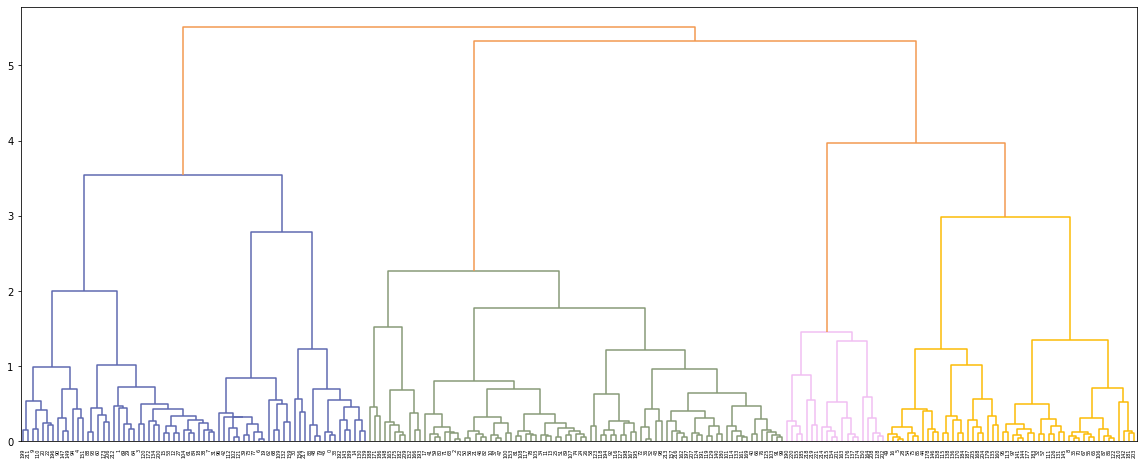

Wall time: 3.44 s


In [20]:
%%time
# Taking a look at our data with scipy cluster hierarchy 
normalized = normalize(df2)
mergings = linkage(normalized, method="ward")
plt.figure(figsize=(20,8))
dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)
plt.show()

In [24]:
df3 = pd.DataFrame(normalized)
df3.columns = df2.columns
cluster = AgglomerativeClustering(
    n_clusters=2,
    affinity="euclidean",
    linkage="ward"
)
labels = cluster.fit_predict(df3)
# labels[:5] ==> array([0, 0, 0, 1, 0], dtype=int64)

In [25]:
df2

,Age,2021 Games,2021 GS,2021 Tgt,2021 Rec,2021 RushingYds,2021 RushingTD,2021 RushingAtt,2021 ReceivingYds,2021 ReceivingTD,...,Touchdowns20,TotYdsScrm20,Production20,Usage21,Touchdowns21,TotYdsScrm21,Average Total Usage,Average Total Yards,Average Total Production,AVG
0,22.0,17,17,51.0,40.0,1811.0,18.0,332.0,360.0,2.0,...,12.0,1468.0,81.918819,22.529412,20.0,2171.0,13.532026,1213.000000,59.723157,1.0
1,26.0,16,16,94.0,70.0,911.0,12.0,206.0,647.0,8.0,...,3.0,933.0,51.712707,18.750000,20.0,1558.0,17.283333,1347.000000,79.979791,3.0
2,28.0,17,17,191.0,145.0,18.0,0.0,4.0,1947.0,16.0,...,3.0,1007.0,70.138889,19.764706,16.0,1965.0,16.138235,1379.000000,84.274732,3.5
3,27.0,8,8,20.0,18.0,937.0,10.0,219.0,154.0,0.0,...,17.0,2141.0,84.420538,29.875000,10.0,1091.0,25.745833,1659.333333,67.397175,3.8
4,25.0,7,7,41.0,37.0,442.0,1.0,99.0,343.0,1.0,...,6.0,374.0,14.615385,20.000000,2.0,785.0,24.270833,1183.666667,47.962044,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,23.0,17,0,4.0,2.0,98.0,0.0,36.0,13.0,0.0,...,4.0,429.0,55.424000,2.352941,0.0,111.0,3.388480,180.000000,34.199667,394.0
218,22.0,2,0,1.0,1.0,3.0,0.0,3.0,11.0,0.0,...,0.0,167.0,43.738095,2.000000,0.0,14.0,1.939394,60.333333,16.912698,395.0
219,25.0,13,2,17.0,9.0,14.0,0.0,3.0,98.0,0.0,...,1.0,124.0,75.000000,2.000000,0.0,112.0,1.222222,78.666667,43.666667,397.0
220,23.0,11,0,5.0,4.0,61.0,0.0,13.0,9.0,0.0,...,0.0,0.0,0.000000,1.636364,0.0,70.0,0.545455,23.333333,14.259259,399.0


### <span style='color:green '>Chart the results from our Clustering </span>  
<span style='color:green '>A visual comparison of our Normalized data </span>  
<span style='color:green '>The results suggest between 2 and 4 clusters </span>

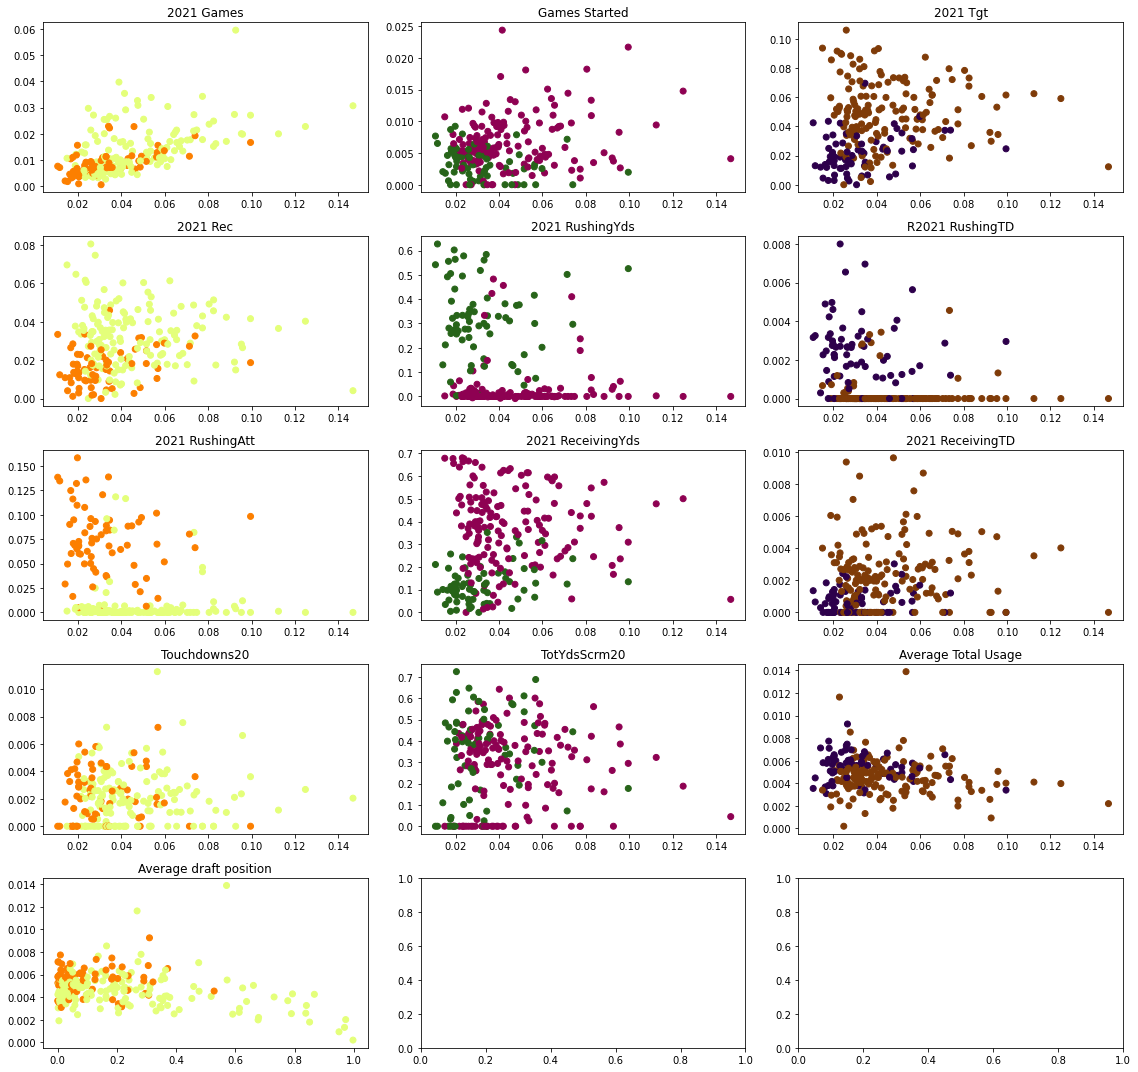

In [44]:
# Define Figure to hold all of our subplots
fig, axs = plt.subplots( nrows=5, ncols=3, figsize=(16, 15))

# Build some quick plots to get a look at our data after it was normailized
# The Speaq had the strongest "apparent correlation" in the data and was used as x in each visualization 
# The color is defined by our original target column 
axs[0,0].scatter(x=df3['Average Total Production'], y=df3['2021 Games'], c=labels, cmap='Wistia')
axs[0,0].set_title('2021 Games')
axs[0,1].scatter(x=df3["Average Total Production"], y=df3['2021 GS'], c=labels, cmap='PiYG')
axs[0,1].set_title('Games Started')
axs[0,2].scatter(x=df3["Average Total Production"], y=df3['2021 Tgt'], c=labels, cmap='PuOr')
axs[0,2].set_title('2021 Tgt')
axs[1,0].scatter(x=df3["Average Total Production"], y=df3['2021 Rec'], c=labels, cmap='Wistia')
axs[1,0].set_title('2021 Rec')
axs[1,1].scatter(x=df3["Average Total Production"], y=df3['2021 RushingYds'], c=labels, cmap='PiYG')
axs[1,1].set_title('2021 RushingYds')
axs[1,2].scatter(x=df3["Average Total Production"], y=df3['2021 RushingTD'], c=labels, cmap='PuOr')
axs[1,2].set_title('2021 RushingTD')
axs[2,0].scatter(x=df3["Average Total Production"], y=df3['2021 RushingAtt'], c=labels, cmap='Wistia')
axs[2,0].set_title('2021 RushingAtt')
axs[2,1].scatter(x=df3["Average Total Production"], y=df3['2021 ReceivingYds'], c=labels, cmap='PiYG')
axs[2,1].set_title('2021 ReceivingYds')
axs[2,2].scatter(x=df3["Average Total Production"], y=df3['2021 ReceivingTD'], c=labels, cmap='PuOr')
axs[2,2].set_title('2021 ReceivingTD')
axs[3,0].scatter(x=df3["Average Total Production"], y=df3['Touchdowns20'], c=labels, cmap='Wistia')
axs[3,0].set_title('Touchdowns20')
axs[3,1].scatter(x=df3["Average Total Production"], y=df3['TotYdsScrm20'], c=labels, cmap='PiYG')
axs[3,1].set_title('TotYdsScrm20')
axs[3,2].scatter(x=df3["Average Total Production"], y=df3['Average Total Usage'], c=labels, cmap='PuOr')
axs[3,2].set_title('Average Total Usage')
# To View ADP directly against orginal target 
axs[4,0].scatter(x=df3["AVG"], y=df3['Average Total Usage'], c=labels, cmap='Wistia')
axs[4,0].set_title('Average draft position')
# set the spacing between subplots
fig.tight_layout()
plt.show()

## <span style='color:green '> Scale </span>
<span style='color:green '>Scale with Sklearn Standard Scaler</span>

In [29]:
# Standarize data with StandarScaler
df2s = StandardScaler().fit_transform(df2)
print(df2s[0:1])

[[-1.28309959  0.92252572  1.59877373 -0.23127453 -0.0346273   4.91903452
   5.48492862  3.83919119 -0.26635271 -0.30477042  3.99271976 -1.31250923
  -0.91156659 -0.91704953 -0.91599766 -0.43318008 -0.38106115 -0.43114117
  -0.84616514 -0.763278   -0.94927843  0.69936057  1.13992046 -0.22889759
   0.08332681  3.1781925   3.32078264  2.89178637 -0.22296618 -0.50113968
   2.14375356 -0.97121932 -0.82952069 -0.91397039 -1.2191519   1.58769463
   2.06788367  2.09861656  0.85621128  2.49935333  4.12728203  3.71110661
   1.06411385  1.83247428  0.17060759 -1.50765171]]


## <span style='color:green '>PCA</span>
<span style='color:green '>Applying PCA to reduce dimensions while preserving 90% of the explained variance </span>


In [30]:
# Applying PCA to reduce dimensions while preserving 90% of the explained variance 
# Initialize PCA model by setting n-components to desired level
pca = PCA(n_components= .90)

# Fit our new Principal Component Analysis reduced Features to our Model
myo_pca = pca.fit_transform(df2s)

<span style='color:green '>At a setting to preserve 90% of the explained variance in the reduction the number of feature is reduced from 14 to 10</span>

In [31]:
# Transform PCA data to a DataFrame
df_myo_pca = pd.DataFrame(data=myo_pca)
df_myo_pca.head(2)

,0,1,2,3,4,5,6,7
0,4.425461,8.191345,8.420746,-2.622744,1.556361,4.655522,0.551331,0.477466
1,8.530539,3.173549,1.894099,4.190306,1.218452,2.566271,0.089669,-1.134222


In [11]:
# Fetch the explained variance
# pca.explained_variance_ratio_  ==>>array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
#        0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

### <span style='color:green '> K-Means</span>

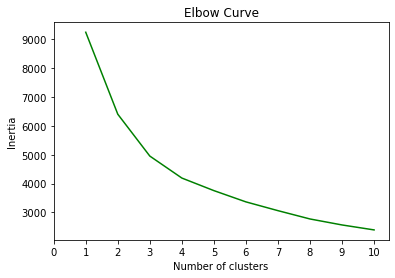

In [32]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myo_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'], c='green')
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

<span style='color:green '>Based on the elbow curve above it seems the best value for k might be 3</span>  
<span style='color:green '>Because our elbow is not difinitive we will look at the 'k' value in another way.</span>
#### <span style='color:green '> K-Means elbow curve respresented as a scatter plot</span>
<span style='color:green '> First Pair of plots show the final value of k=10</span>  
<span style='color:green '> The Next 2 plots are the most likely two values of 2 or 3</span>

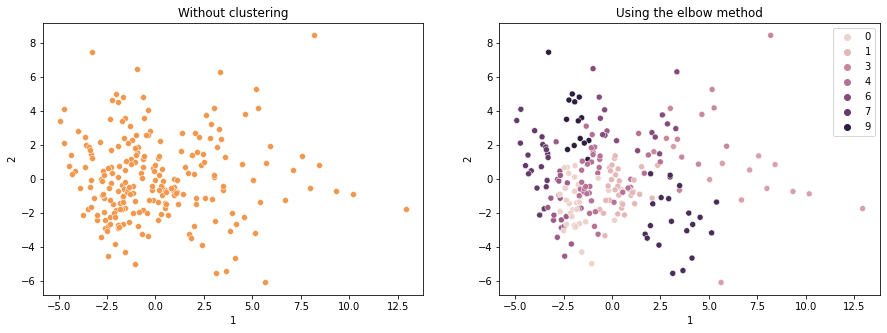

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df_myo_pca, x=df_myo_pca[1], y=df_myo_pca[2]).set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df_myo_pca, x=df_myo_pca[1], y=df_myo_pca[2],
    hue=km.labels_).set_title('Using the elbow method');

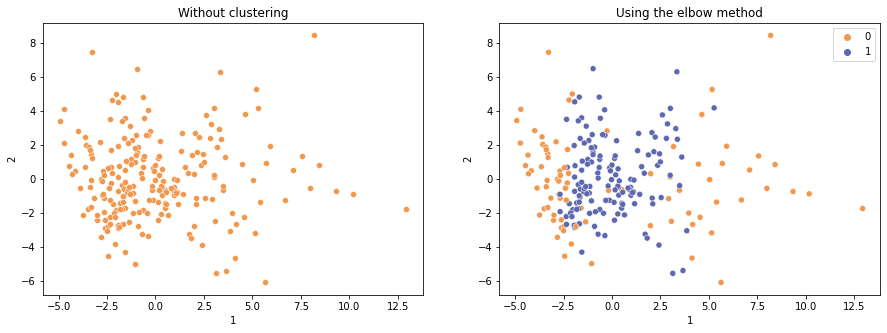

In [34]:
# Take a look at k=2

# Initializing model with K = 2 (since there are two options Myopic and Not Myopic)
model = KMeans(n_clusters=2, random_state=1)
# Fitting model
model.fit(df2)
# Get predictions
predictions = model.predict(df2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df_myo_pca, x=df_myo_pca[1], y=df_myo_pca[2]).set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df_myo_pca, x=df_myo_pca[1], y=df_myo_pca[2],
    hue=model.labels_).set_title('Using the elbow method');

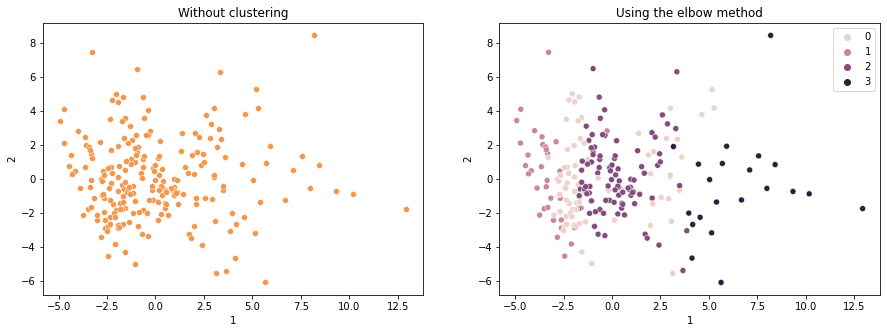

In [45]:
# Take a look at k=3

# Initializing model with K = 3 (since there are two options Myopic and Not Myopic)
model = KMeans(n_clusters=4, random_state=1)
# Fitting model
model.fit(df2)
# Get predictions
predictions = model.predict(df2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df_myo_pca, x=df_myo_pca[1], y=df_myo_pca[2]).set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df_myo_pca, x=df_myo_pca[1], y=df_myo_pca[2],
    hue=model.labels_).set_title('Using the elbow method');

### <span style='color:green '>This Group of Charts is with Standard Scaling and PCA Applied </span>
<span style='color:green '>Below is a group of scatter charts for a better view of our data </span>  
<span style='color:green '>Looking for any new patterns within the modified features </span>  
<span style='color:green '>No specific patterns in the data revealed themself </span>  

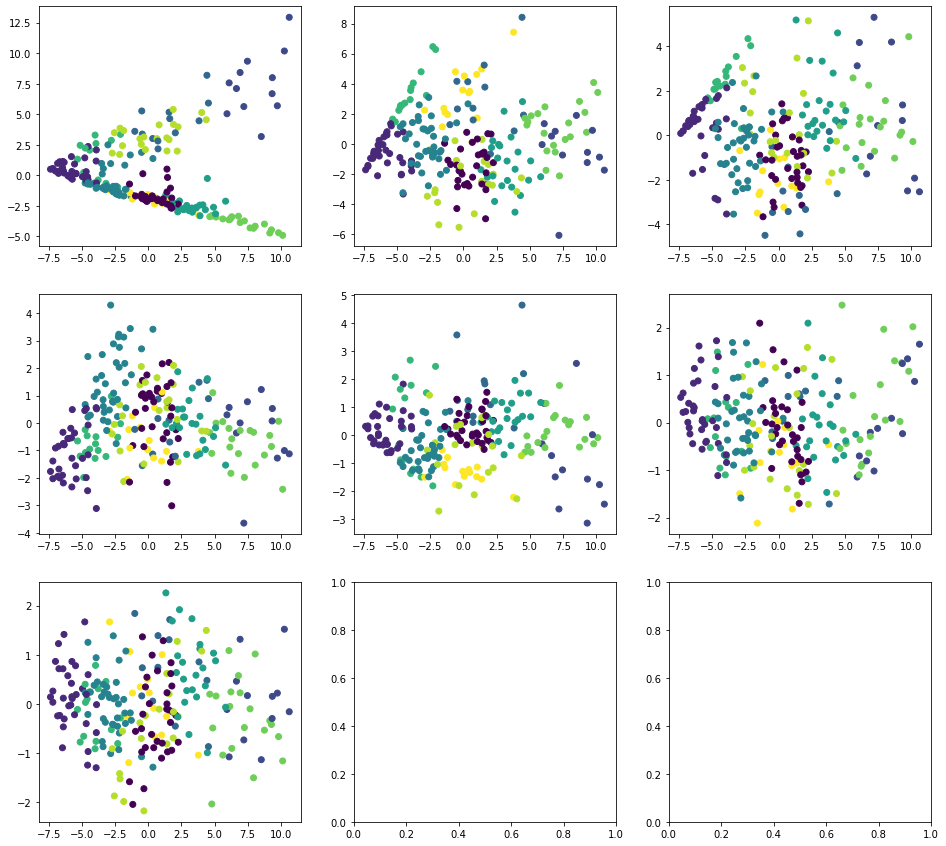

In [37]:
# Define Figure to hold all of our subplots
fig, axs = plt.subplots( nrows=3, ncols=3, figsize=(16, 15))

# Build some quick plots to get a look at our reduced data
# The first reduced feature in the data and was used as x in each
# visualization.  This selection was random 
# The color is defined by our K-means results
axs[0,0].scatter(x=df_myo_pca[0], y=df_myo_pca[1], c=km.labels_)
axs[0,1].scatter(x=df_myo_pca[0], y=df_myo_pca[2], c=km.labels_)
axs[0,2].scatter(x=df_myo_pca[0], y=df_myo_pca[3], c=km.labels_)
axs[1,0].scatter(x=df_myo_pca[0], y=df_myo_pca[4], c=km.labels_)
axs[1,1].scatter(x=df_myo_pca[0], y=df_myo_pca[5], c=km.labels_)
axs[1,2].scatter(x=df_myo_pca[0], y=df_myo_pca[6], c=km.labels_)
axs[2,0].scatter(x=df_myo_pca[0], y=df_myo_pca[7], c=km.labels_)
# axs[2,1].scatter(x=df_myo_pca[0], y=df_myo_pca[8], c=km.labels_)
# axs[2,2].scatter(x=df_myo_pca[0], y=df_myo_pca[9], c=km.labels_)
plt.show()

#### <span style='color:green '>The new charts above show a more even distribution of Features</span>

In [38]:
# Initializing model with K = 4
model = KMeans(n_clusters=4, random_state=1)
# Fitting model
model.fit(df2)
# Get predictions
predictions = model.predict(df2)
# print(predictions)
# print(model.labels_)

In [39]:
# Add a new class column to DF2
df2["Draft_predict"] = model.labels_
df2.head()

,Age,2021 Games,2021 GS,2021 Tgt,2021 Rec,2021 RushingYds,2021 RushingTD,2021 RushingAtt,2021 ReceivingYds,2021 ReceivingTD,...,TotYdsScrm20,Production20,Usage21,Touchdowns21,TotYdsScrm21,Average Total Usage,Average Total Yards,Average Total Production,AVG,Draft_predict
0,22.0,17,17,51.0,40.0,1811.0,18.0,332.0,360.0,2.0,...,1468.0,81.918819,22.529412,20.0,2171.0,13.532026,1213.000000,59.723157,1.0,1
1,26.0,16,16,94.0,70.0,911.0,12.0,206.0,647.0,8.0,...,933.0,51.712707,18.750000,20.0,1558.0,17.283333,1347.000000,79.979791,3.0,1
2,28.0,17,17,191.0,145.0,18.0,0.0,4.0,1947.0,16.0,...,1007.0,70.138889,19.764706,16.0,1965.0,16.138235,1379.000000,84.274732,3.5,2
3,27.0,8,8,20.0,18.0,937.0,10.0,219.0,154.0,0.0,...,2141.0,84.420538,29.875000,10.0,1091.0,25.745833,1659.333333,67.397175,3.8,1
4,25.0,7,7,41.0,37.0,442.0,1.0,99.0,343.0,1.0,...,374.0,14.615385,20.000000,2.0,785.0,24.270833,1183.666667,47.962044,4.0,1


## <span style='color:green '>t-SNE (t-distributed stochastic neighbor embedding)</span>
<span style='color:green '> </span>

In [40]:
# Initialize t-SNE
tsne = TSNE(learning_rate=5, perplexity=30.0, random_state=1)
# tsne = TSNE(learning_rate=35, random_state=10)

In [41]:
tsne_features = tsne.fit_transform(df2)
tsne_features.shape
tsne_features

array([[ 4.82724333e+00, -2.59006977e+00],
       [ 7.13734102e+00, -1.19330540e+01],
       [-1.54248943e+01, -2.63657808e+00],
       [ 4.91109657e+00, -1.29905043e+01],
       [ 8.57032871e+00, -1.12311354e+01],
       [-9.53869057e+00,  3.32543135e+00],
       [ 1.04159460e+01, -5.82818925e-01],
       [ 4.98413372e+00, -1.24854174e+01],
       [-3.14376497e+00,  1.06410580e+01],
       [ 7.17586184e+00, -1.09961777e+01],
       [-1.55877485e+01, -3.69327784e+00],
       [-1.54312487e+01, -4.70908785e+00],
       [ 6.01725101e+00, -1.24571819e+01],
       [-1.49162884e+01, -5.09208679e+00],
       [ 5.59830618e+00, -4.15165567e+00],
       [ 5.52368498e+00, -1.17401390e+01],
       [-8.35750294e+00,  3.73262239e+00],
       [-1.39067793e+01, -1.53936946e+00],
       [ 4.91545296e+00, -1.16231298e+01],
       [ 9.73154831e+00, -2.88701385e-01],
       [ 8.75486946e+00, -9.60162449e+00],
       [-1.50043669e+01, -3.83220696e+00],
       [ 7.56018162e+00, -1.12146130e+01],
       [-1.

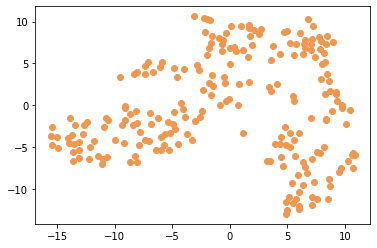

In [42]:
# Prepare and plot the dataset
# Assign tsne features to x and y axis'
df2['x'] = tsne_features[:,0]
df2['y'] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(df2['x'], df2['y'])
plt.show()

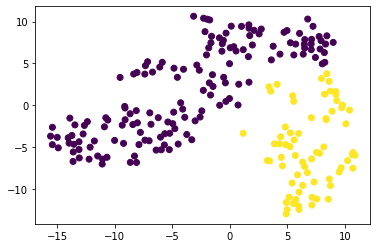

In [43]:
# Visualize the clusters with color
plt.scatter(df2['x'], df2['y'], c=labels)
plt.show()

## <span style='color:green '>Skill Positions Can be Clusterd</span>
### <span style='color:green '>This analysis confirms what we already suspect, that is each skill position would form it's own cluster. </span>